# Kaggle Competition for House Prices

In [1]:
#importing libraries

import pandas as pd 
import numpy as np 
import matplotlib as plt
%matplotlib inline 
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv('test.csv')
test_df.shape

(1459, 80)

In [4]:
df.shape

(1460, 81)

## Data fields

brief version of eah row.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## Cleaning data

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

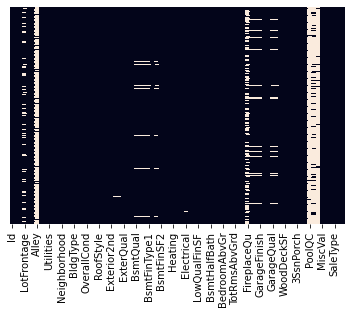

In [6]:
# checking the null values 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# going line by line or column by column and in both the dfs

df["LotFrontage"] = df["LotFrontage"].fillna(df['LotFrontage'].mean()) 

In [9]:
# mszoning has null values here which are not in train df
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
# dropping alley column coz its having many null values 
df.drop(['Alley'], axis=1, inplace=True)

In [11]:
#going feature by feature and filling those categorical values with mode and the columns having more than 70 to 80% null values dropping it 
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [13]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [15]:
df.shape

(1460, 76)

In [16]:
df.drop(['Id'], axis=1, inplace=True)

In [17]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

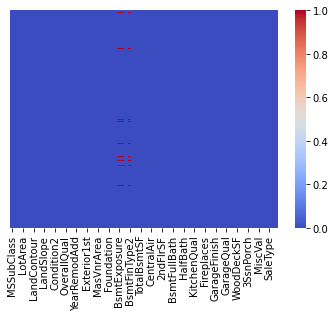

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='coolwarm')

In [20]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

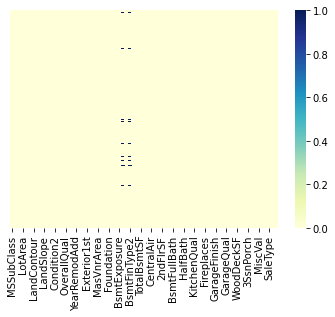

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='YlGnBu')

In [22]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [23]:
df.dropna(inplace=True)

In [24]:
df.shape

(1422, 75)

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Handle categorical features

In [26]:
# test data has less categories than the train df, so will combine this two dfs to have proper and same categoreis 

In [27]:
columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
          'Condition2', 'BldgType', 'Condition1', 'HouseStyle', 'SaleType', 'SaleCondition', 'ExterCond', 'ExterQual',
          'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl',
           'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
           'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'PavedDrive']

In [28]:
len(columns)

39

In [29]:
def category_onehot_multcols(multcolumns):
    
    df_final = final_df
    i = 0
    
    for fields in multcolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        final_df.drop([fields], axis=1, inplace=True)
        
        if i == 0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
        
        i += 1
    
    df_final = pd.concat([final_df, df_final], axis=1)
    
    return df_final

In [30]:
main_df = df.copy()

In [31]:
# combining test data
test_df = pd.read_csv('formulatedtest.csv')

In [32]:
test_df.shape

(1459, 74)

In [33]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [34]:
final_df = pd.concat([df, test_df], axis=0)

In [35]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [36]:
final_df.shape

(2881, 75)

In [37]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_df.shape

(2881, 235)

In [39]:
#removing duplicates
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [40]:
final_df.shape

(2881, 175)

In [41]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [42]:
#converting it into train and test df 
df_Train = final_df.iloc[:1422, :]
df_Test = final_df.iloc[1422:, :]

In [43]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [45]:
df_Train.shape

(1422, 175)

In [46]:
df_Test.shape

(1459, 175)

In [47]:
df_Test.drop(['SalePrice'], axis=1, inplace=True)

/Users/ziiv/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 174 entries, MSSubClass to P
dtypes: float64(10), int64(25), uint8(139)
memory usage: 608.4 KB


In [49]:
X_train = df_Train.drop(['SalePrice'], axis=1)
y_train = df_Train['SalePrice']

## Prediction and selecting algorithm 

In [50]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [51]:
import xgboost as xgb
classifier = xgb.XGBRegressor()
classifier.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
import pickle 
filename = 'finalized_model_pk1'
pickle.dump(classifier, open(filename, 'wb'))

In [53]:
y_pred = classifier.predict(df_Test)

In [54]:
y_pred

array([129051.695, 150099.22 , 196159.06 , ..., 169300.45 , 108080.62 ,
       233303.56 ], dtype=float32)

In [55]:
#create sample submission file and submit 

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'Saleprice']
datasets.to_csv('sample_submission1.csv', index=False)

In [56]:
regressor = xgb.XGBRegressor()

In [57]:
booster = ['gbtree', 'gblinear']
base_score = [0.25, 0.5, 0.75, 1]

In [58]:
#hyperparameter optimization

n_estimators = [100, 500, 900, 1100, 1500] #level of decision tree
max_depth = [2, 3, 5, 10, 15]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]

#defining the grid of hyperparameters to search 
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}

In [59]:
#seting up random search with 4-fold cross validation 

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=regressor, param_distributions=hyperparameter_grid, cv=5, n_iter=50,
                               scoring = 'neg_mean_absolute_error', n_jobs=4, verbose=5, return_train_score = True, 
                            random_state=42)

In [60]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [61]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
regressor = xgb.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, 
                             colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain', 
                             interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
import pickle
filename = 'finalized_model_pk1'
pickle.dump(classifier, open(filename, 'wb'))

In [65]:
y_pred = regressor.predict(df_Test)

In [66]:
y_pred

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

In [67]:
# creating sample submission file

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission2.csv', index=False)

# Artificial Neural Network 

In [68]:
# pred.columns = ["Saleprice"]

In [69]:
# temp_df = df_Train['SalePrice'].copy()

In [70]:
# temp_df.column=['SalePrice']

In [71]:
# df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [72]:
# df_Train=pd.concat([df_Train,temp_df],axis=1)

In [73]:
# df_Test.head()

In [74]:
# df_Test=pd.concat([df_Test,pred],axis=1)

In [75]:
# df_Train=pd.concat([df_Train,df_Test],axis=0)

In [76]:
# df_Train.shape

In [77]:
# X_train=df_Train.drop(['SalePrice'],axis=1)
# y_train=df_Train['SalePrice']

In [78]:
# X_train.shape

In [79]:
from tensorflow.keras import backend as K
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [81]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, epochs = 1000)

Epoch 1/1000
114/114 [==============================] - 2s 8ms/step - loss: 193399.8277 - val_loss: 171401.7812
Epoch 2/1000
114/114 [==============================] - 0s 2ms/step - loss: 146545.7719 - val_loss: 84852.6719
Epoch 3/1000
114/114 [==============================] - 0s 3ms/step - loss: 72041.0156 - val_loss: 65154.4648
Epoch 4/1000
114/114 [==============================] - 0s 3ms/step - loss: 59774.5606 - val_loss: 63859.1992
Epoch 5/1000
114/114 [==============================] - 0s 2ms/step - loss: 73366.3958 - val_loss: 62651.9023
Epoch 6/1000
114/114 [==============================] - 0s 3ms/step - loss: 61870.7464 - val_loss: 61521.7617
Epoch 7/1000
114/114 [==============================] - 0s 3ms/step - loss: 61441.8311 - val_loss: 60317.6406
Epoch 8/1000
114/114 [==============================] - 0s 3ms/step - loss: 58436.2683 - val_loss: 59146.7070
Epoch 9/1000
114/114 [==============================] - 0s 2ms/step - loss: 58230.6222 - val_loss: 58057.5352
Epoch 1

Epoch 75/1000
114/114 [==============================] - 0s 2ms/step - loss: 35080.2934 - val_loss: 44323.4102
Epoch 76/1000
114/114 [==============================] - 0s 2ms/step - loss: 36066.1225 - val_loss: 44820.2930
Epoch 77/1000
114/114 [==============================] - 0s 2ms/step - loss: 33314.0863 - val_loss: 44461.8477
Epoch 78/1000
114/114 [==============================] - 0s 2ms/step - loss: 34574.7445 - val_loss: 44281.6875
Epoch 79/1000
114/114 [==============================] - 0s 2ms/step - loss: 33536.7725 - val_loss: 44265.1953
Epoch 80/1000
114/114 [==============================] - 0s 2ms/step - loss: 32850.1844 - val_loss: 44320.3086
Epoch 81/1000
114/114 [==============================] - 0s 2ms/step - loss: 34200.5260 - val_loss: 44532.5117
Epoch 82/1000
114/114 [==============================] - 0s 2ms/step - loss: 34845.6015 - val_loss: 44447.2969
Epoch 83/1000
114/114 [==============================] - 0s 2ms/step - loss: 35583.0653 - val_loss: 44341.0469
E

114/114 [==============================] - 0s 2ms/step - loss: 32510.1176 - val_loss: 43996.0391
Epoch 149/1000
114/114 [==============================] - 0s 2ms/step - loss: 32910.5993 - val_loss: 44401.6719
Epoch 150/1000
114/114 [==============================] - 0s 2ms/step - loss: 32567.4715 - val_loss: 43999.4766
Epoch 151/1000
114/114 [==============================] - 0s 2ms/step - loss: 32444.3946 - val_loss: 43929.1914
Epoch 152/1000
114/114 [==============================] - 0s 2ms/step - loss: 33746.5704 - val_loss: 43903.8008
Epoch 153/1000
114/114 [==============================] - 0s 2ms/step - loss: 32194.2009 - val_loss: 43936.2617
Epoch 154/1000
114/114 [==============================] - 0s 2ms/step - loss: 32760.0374 - val_loss: 44092.8398
Epoch 155/1000
114/114 [==============================] - 0s 2ms/step - loss: 31278.9008 - val_loss: 44043.1914
Epoch 156/1000
114/114 [==============================] - 0s 2ms/step - loss: 33278.4946 - val_loss: 44224.1641
Epoch 1

114/114 [==============================] - 0s 2ms/step - loss: 30335.4639 - val_loss: 44410.6445
Epoch 222/1000
114/114 [==============================] - 0s 2ms/step - loss: 31085.9273 - val_loss: 44266.5508
Epoch 223/1000
114/114 [==============================] - 0s 2ms/step - loss: 31438.2405 - val_loss: 44547.4375
Epoch 224/1000
114/114 [==============================] - 0s 3ms/step - loss: 29617.8535 - val_loss: 44374.7070
Epoch 225/1000
114/114 [==============================] - 0s 2ms/step - loss: 28144.3164 - val_loss: 44514.7617
Epoch 226/1000
114/114 [==============================] - 0s 2ms/step - loss: 29706.7497 - val_loss: 44355.1172
Epoch 227/1000
114/114 [==============================] - 0s 2ms/step - loss: 28682.7171 - val_loss: 44369.8398
Epoch 228/1000
114/114 [==============================] - 0s 2ms/step - loss: 31999.5001 - val_loss: 44134.5703
Epoch 229/1000
114/114 [==============================] - 0s 2ms/step - loss: 32353.8941 - val_loss: 44230.1328
Epoch 2

114/114 [==============================] - 0s 3ms/step - loss: 28694.7793 - val_loss: 43993.9336
Epoch 295/1000
114/114 [==============================] - 0s 2ms/step - loss: 31942.3948 - val_loss: 44403.4219
Epoch 296/1000
114/114 [==============================] - 0s 2ms/step - loss: 29214.0696 - val_loss: 43924.8086
Epoch 297/1000
114/114 [==============================] - 0s 2ms/step - loss: 29051.1627 - val_loss: 43870.6641
Epoch 298/1000
114/114 [==============================] - 0s 2ms/step - loss: 28523.5789 - val_loss: 43986.6250
Epoch 299/1000
114/114 [==============================] - 0s 4ms/step - loss: 30924.0210 - val_loss: 43819.6758
Epoch 300/1000
114/114 [==============================] - 0s 3ms/step - loss: 31909.7061 - val_loss: 44069.5352
Epoch 301/1000
114/114 [==============================] - 0s 3ms/step - loss: 29262.1674 - val_loss: 43791.8125
Epoch 302/1000
114/114 [==============================] - 0s 3ms/step - loss: 29469.5552 - val_loss: 43665.1680
Epoch 3

114/114 [==============================] - 0s 3ms/step - loss: 28367.2664 - val_loss: 43644.5469
Epoch 368/1000
114/114 [==============================] - 0s 3ms/step - loss: 27766.9655 - val_loss: 43818.4648
Epoch 369/1000
114/114 [==============================] - 0s 2ms/step - loss: 29584.7542 - val_loss: 43191.1758
Epoch 370/1000
114/114 [==============================] - 0s 2ms/step - loss: 24927.8333 - val_loss: 43164.5352
Epoch 371/1000
114/114 [==============================] - 0s 2ms/step - loss: 28305.9463 - val_loss: 43353.8789
Epoch 372/1000
114/114 [==============================] - 0s 2ms/step - loss: 29420.8798 - val_loss: 43154.6133
Epoch 373/1000
114/114 [==============================] - 0s 2ms/step - loss: 25859.9391 - val_loss: 43020.6211
Epoch 374/1000
114/114 [==============================] - 0s 2ms/step - loss: 27585.1949 - val_loss: 43232.0898
Epoch 375/1000
114/114 [==============================] - 0s 2ms/step - loss: 27258.9766 - val_loss: 43075.6641
Epoch 3

114/114 [==============================] - 0s 2ms/step - loss: 28011.6451 - val_loss: 42583.4805
Epoch 441/1000
114/114 [==============================] - 0s 2ms/step - loss: 27174.2056 - val_loss: 42344.4570
Epoch 442/1000
114/114 [==============================] - 0s 2ms/step - loss: 26972.9197 - val_loss: 42097.1094
Epoch 443/1000
114/114 [==============================] - 0s 2ms/step - loss: 27525.9839 - val_loss: 42025.7266
Epoch 444/1000
114/114 [==============================] - 0s 2ms/step - loss: 28257.0994 - val_loss: 42163.4648
Epoch 445/1000
114/114 [==============================] - 0s 2ms/step - loss: 30809.6077 - val_loss: 42108.1992
Epoch 446/1000
114/114 [==============================] - 0s 2ms/step - loss: 26984.8667 - val_loss: 42210.6250
Epoch 447/1000
114/114 [==============================] - 0s 2ms/step - loss: 25618.1553 - val_loss: 42209.7461
Epoch 448/1000
114/114 [==============================] - 0s 2ms/step - loss: 27643.4833 - val_loss: 42073.8281
Epoch 4

114/114 [==============================] - 1s 6ms/step - loss: 23939.6252 - val_loss: 41659.0430
Epoch 514/1000
114/114 [==============================] - 0s 2ms/step - loss: 24220.2011 - val_loss: 42073.7344
Epoch 515/1000
114/114 [==============================] - 0s 4ms/step - loss: 26375.6036 - val_loss: 40823.4219
Epoch 516/1000
114/114 [==============================] - 1s 5ms/step - loss: 22261.2714 - val_loss: 41676.5391
Epoch 517/1000
114/114 [==============================] - 0s 3ms/step - loss: 25343.9182 - val_loss: 40793.0742
Epoch 518/1000
114/114 [==============================] - 0s 2ms/step - loss: 24724.4340 - val_loss: 41077.5352
Epoch 519/1000
114/114 [==============================] - 0s 2ms/step - loss: 22863.8475 - val_loss: 40731.2930
Epoch 520/1000
114/114 [==============================] - 0s 3ms/step - loss: 23672.9871 - val_loss: 40540.5664
Epoch 521/1000
114/114 [==============================] - 0s 3ms/step - loss: 24416.6600 - val_loss: 40385.4922
Epoch 5

114/114 [==============================] - 0s 3ms/step - loss: 23482.7014 - val_loss: 39143.1289
Epoch 587/1000
114/114 [==============================] - 0s 2ms/step - loss: 25365.9100 - val_loss: 39044.8203
Epoch 588/1000
114/114 [==============================] - 0s 2ms/step - loss: 22844.0808 - val_loss: 38842.3789
Epoch 589/1000
114/114 [==============================] - 0s 3ms/step - loss: 24992.2097 - val_loss: 39585.3203
Epoch 590/1000
114/114 [==============================] - 0s 2ms/step - loss: 24383.0646 - val_loss: 38937.2148
Epoch 591/1000
114/114 [==============================] - 0s 2ms/step - loss: 23567.6232 - val_loss: 39522.6094
Epoch 592/1000
114/114 [==============================] - 0s 3ms/step - loss: 22001.4571 - val_loss: 38705.0273
Epoch 593/1000
114/114 [==============================] - 0s 3ms/step - loss: 26614.3324 - val_loss: 39827.6250
Epoch 594/1000
114/114 [==============================] - 0s 2ms/step - loss: 21611.5466 - val_loss: 38911.7422
Epoch 5

114/114 [==============================] - 0s 2ms/step - loss: 22069.6791 - val_loss: 38149.6250
Epoch 660/1000
114/114 [==============================] - 0s 2ms/step - loss: 23586.4825 - val_loss: 37930.1211
Epoch 661/1000
114/114 [==============================] - 0s 4ms/step - loss: 23324.7932 - val_loss: 38696.9805
Epoch 662/1000
114/114 [==============================] - 1s 5ms/step - loss: 21560.6565 - val_loss: 39350.9297
Epoch 663/1000
114/114 [==============================] - 1s 5ms/step - loss: 23046.7285 - val_loss: 38011.9492
Epoch 664/1000
114/114 [==============================] - 1s 5ms/step - loss: 22001.3697 - val_loss: 38905.5078
Epoch 665/1000
114/114 [==============================] - 0s 3ms/step - loss: 21415.1378 - val_loss: 38188.7617
Epoch 666/1000
114/114 [==============================] - 0s 4ms/step - loss: 21437.3596 - val_loss: 37900.2422
Epoch 667/1000
114/114 [==============================] - 0s 2ms/step - loss: 25930.9797 - val_loss: 38206.0859
Epoch 6

114/114 [==============================] - 0s 4ms/step - loss: 22502.4087 - val_loss: 37941.0859
Epoch 733/1000
114/114 [==============================] - 0s 2ms/step - loss: 22316.4079 - val_loss: 37824.2031
Epoch 734/1000
114/114 [==============================] - 0s 2ms/step - loss: 24868.7140 - val_loss: 38024.7031
Epoch 735/1000
114/114 [==============================] - 0s 4ms/step - loss: 21677.3168 - val_loss: 37721.5586
Epoch 736/1000
114/114 [==============================] - 0s 2ms/step - loss: 21727.4442 - val_loss: 37465.1797
Epoch 737/1000
114/114 [==============================] - 0s 3ms/step - loss: 21439.6748 - val_loss: 37514.5508
Epoch 738/1000
114/114 [==============================] - 0s 3ms/step - loss: 23000.9614 - val_loss: 37467.0586
Epoch 739/1000
114/114 [==============================] - 0s 2ms/step - loss: 25939.2355 - val_loss: 37336.7383
Epoch 740/1000
114/114 [==============================] - 0s 2ms/step - loss: 23246.7317 - val_loss: 37499.1758
Epoch 7

114/114 [==============================] - 0s 4ms/step - loss: 19163.1909 - val_loss: 37441.0859
Epoch 806/1000
114/114 [==============================] - 0s 2ms/step - loss: 22776.3299 - val_loss: 37112.7500
Epoch 807/1000
114/114 [==============================] - 0s 3ms/step - loss: 21283.0533 - val_loss: 37011.2188
Epoch 808/1000
114/114 [==============================] - 0s 3ms/step - loss: 24184.2102 - val_loss: 37007.8008
Epoch 809/1000
114/114 [==============================] - 0s 2ms/step - loss: 20405.3040 - val_loss: 37300.3789
Epoch 810/1000
114/114 [==============================] - 0s 2ms/step - loss: 18352.9153 - val_loss: 37147.7031
Epoch 811/1000
114/114 [==============================] - 0s 3ms/step - loss: 21372.9403 - val_loss: 37102.6758
Epoch 812/1000
114/114 [==============================] - 0s 3ms/step - loss: 23259.6208 - val_loss: 39184.6836
Epoch 813/1000
114/114 [==============================] - 0s 2ms/step - loss: 20543.5754 - val_loss: 37339.5000
Epoch 8

114/114 [==============================] - 0s 3ms/step - loss: 20233.2649 - val_loss: 36985.1055
Epoch 879/1000
114/114 [==============================] - 0s 2ms/step - loss: 19148.7258 - val_loss: 37086.7305
Epoch 880/1000
114/114 [==============================] - 0s 3ms/step - loss: 22175.9216 - val_loss: 37220.5352
Epoch 881/1000
114/114 [==============================] - 0s 3ms/step - loss: 20249.7700 - val_loss: 37148.0898
Epoch 882/1000
114/114 [==============================] - 0s 4ms/step - loss: 21064.9838 - val_loss: 36906.2070
Epoch 883/1000
114/114 [==============================] - 0s 3ms/step - loss: 21348.7152 - val_loss: 37143.6016
Epoch 884/1000
114/114 [==============================] - 0s 3ms/step - loss: 20037.4794 - val_loss: 37501.5508
Epoch 885/1000
114/114 [==============================] - 0s 2ms/step - loss: 19338.9948 - val_loss: 37190.3672
Epoch 886/1000
114/114 [==============================] - 0s 2ms/step - loss: 20342.3490 - val_loss: 36849.7383
Epoch 8

114/114 [==============================] - 0s 3ms/step - loss: 22746.7754 - val_loss: 37342.2148
Epoch 952/1000
114/114 [==============================] - 0s 3ms/step - loss: 21462.1312 - val_loss: 37123.5078
Epoch 953/1000
114/114 [==============================] - 0s 2ms/step - loss: 18323.6131 - val_loss: 36885.4961
Epoch 954/1000
114/114 [==============================] - 0s 2ms/step - loss: 23279.6761 - val_loss: 37572.6367
Epoch 955/1000
114/114 [==============================] - 0s 2ms/step - loss: 19451.4886 - val_loss: 36558.1445
Epoch 956/1000
114/114 [==============================] - 0s 2ms/step - loss: 21545.9870 - val_loss: 37479.0195
Epoch 957/1000
114/114 [==============================] - 0s 3ms/step - loss: 19445.4527 - val_loss: 36489.3477
Epoch 958/1000
114/114 [==============================] - 0s 2ms/step - loss: 20812.4887 - val_loss: 36949.4531
Epoch 959/1000
114/114 [==============================] - 0s 2ms/step - loss: 19710.7505 - val_loss: 36726.4023
Epoch 9

In [82]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

KeyError: "['SalePrice'] not found in axis"

In [83]:
ann_pred = classifier.predict(df_Test)
ann_pred

array([[120598.984],
       [139502.98 ],
       [191971.78 ],
       ...,
       [185340.42 ],
       [133224.34 ],
       [222842.1  ]], dtype=float32)

In [ ]:
# # Importing the Keras libraries and packages
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LeakyReLU,PReLU,ELU
# from keras.layers import Dropout


# # Initialising the ANN
# classifier = Sequential()

# # Adding the input layer and the first hidden layer
# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# # Adding the second hidden layer
# classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# # Adding the third hidden layer
# classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# # Adding the output layer
# classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# # Compiling the ANN
# classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# # Fitting the ANN to the Training set
# model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [84]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission3.csv',index=False)